# Visualization

## Imports


In [115]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib as plt
xr.__version__

'0.20.2'

In [117]:
odr = xr.open_dataset(
    "/home/rdevinen/palm/current_version/JOBS/practice/OUTPUT/practice_3d.000.nc", engine="netcdf4")

ndr = xr.open_dataset(
    "/home/rdevinen/Documents/GitHub/heatGUIde_palm/static_driver/files/practice_static", engine="netcdf4")
odr["time"] = odr["time"] / np.timedelta64(1, 'h')
indoor_temp = odr["im_t_indoor_mean"] - 273.15
#odr, ndr


### Faceting

Faceting is an effective way of visualizing variations of 3D data where 2D slices are visualized in a panel (subplot) and the third dimensions is varied between panels (subplots).

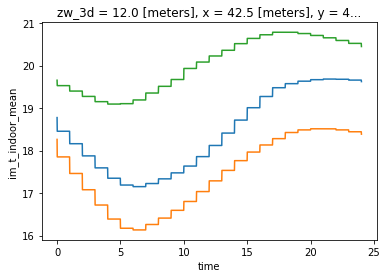

In [118]:
indoor_temp_data = indoor_temp.sel(zw_3d = 12, y = 41, x = 22, method='nearest')
indoor_temp_data1 = indoor_temp.isel(zw_3d = 12, y = 41, x = 32)
indoor_temp_data2 = indoor_temp.isel(zw_3d = 12, y = 41, x = 42)
indoor_temp_data.plot()
indoor_temp_data1.plot()
indoor_temp_data2.plot()

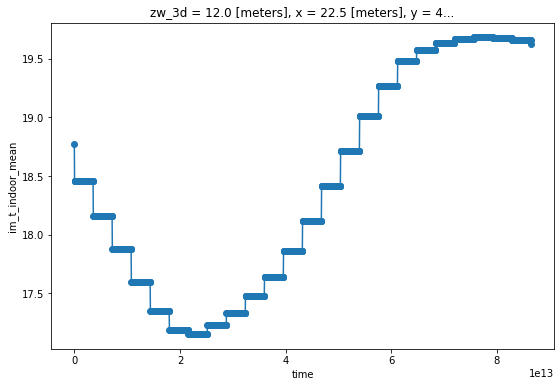

In [49]:
indoor_temp.sel(zw_3d = 12, y = 41, x = 22, method='nearest').plot(marker="o", size=6);

In [108]:
s2 = indoor_temp[:,12,41,22].to_series()
s1 = indoor_temp[:,12,41,32].to_series()
s3 = indoor_temp[:,12,41,42].to_series()

In [130]:
horizontal_stack = pd.concat([s2, s1,s3], axis=1).reset_index()
horizontal_stack.columns = ["time (hours)","type2", "type1", "type3"]
horizontal_stack["time (hours)"] = horizontal_stack["time (hours)"] / np.timedelta64(1, 'h')
horizontal_stack = horizontal_stack.set_index("time (hours)")

<AxesSubplot:xlabel='time (hours)'>

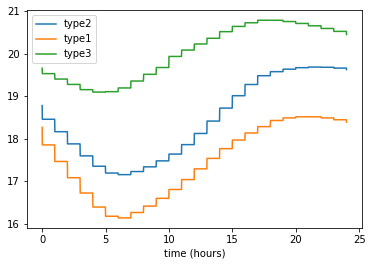

In [129]:
horizontal_stack.plot()

In [ ]:
odr = xr.open_dataset(
    "/home/rdevinen/palm/current_version/JOBS/riz_2/OUTPUT/riz_2_3d.000.nc", engine="netcdf4")

# odr["time"] = odr["time"] / np.timedelta64(1, 'h')

indoor_temp = odr["im_t_indoor_mean"] - 273.15
outdoor_temp = odr["theta"] - 273.15

print("loading Done 2")

#%%% slice
s2 = indoor_temp[:,12,40,22].to_series()
s1 = indoor_temp[:,12,40,32].to_series()
s3 = indoor_temp[:,12,40,42].to_series()
out = outdoor_temp[:,12,40,8].to_series()

#%%% stack
horizontal_stack_summer = pd.concat([s2, s1,s3, out], axis=1).reset_index()
horizontal_stack_summer.columns = ["time (hours)","type2", "type1", "type3", "outdoor"]
horizontal_stack_summer["time (hours)"] = horizontal_stack_summer["time (hours)"] / np.timedelta64(1, 'h')
horizontal_stack_summer = horizontal_stack_summer.set_index("time (hours)")

horizontal_stack_summer.plot(title = "RIZ_summer")